# Classification of rice varieties with deep learning methods
##### -Mayank Srivastava
- <small>[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/mayank-srivastava-6a8421105/)</small>

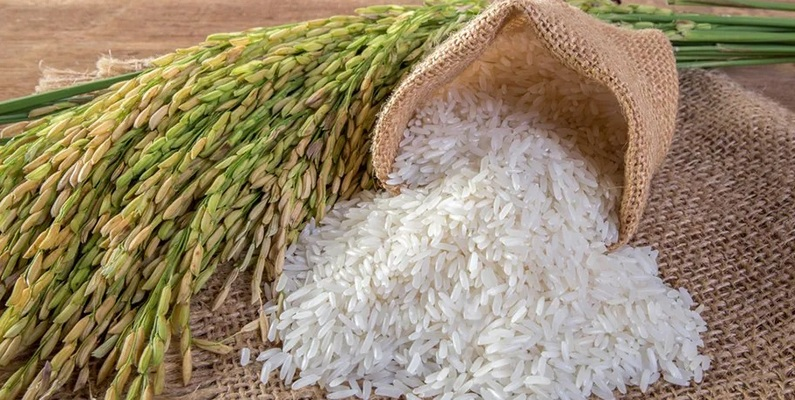

Dataset source: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

#### Context
- Arborio, Basmati, Ipsala, Jasmine and Karacadag rice varieties were used.
- The dataset has 75K images including 15K pieces from each rice variety. 
- CNN models were used to classify rice varieties.
- Classified with an accuracy rate of 90% through the CNN model created.
- The models used achieved successful results in the classification of rice varieties.
    
#### Abstract
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. 

A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. A second dataset with 106 features including 12 morphological, 4 shape and 90 color features obtained from these images was used. Models were created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and by using the Convolutional Neural Network (CNN) algorithm for the image dataset, and classification processes were performed. 

Statistical results of sensitivity, specificity, prediction, F1 score, accuracy, false positive rate and false negative rate were calculated using the confusion matrix values of the models and the results of each model were given in tables. Classification successes from the models were achieved as 99.87% for ANN, 99.95% for DNN and 100% for CNN. With the results, it is seen that the models used in the study in the classification of rice varieties can be applied successfully in this field.

> #### Importing Libraries

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
# Set seeds for reproducibility
import random
seed = 42
random.seed(seed)             # Sets the seed for Python's built-in random module.
np.random.seed(seed)          # Sets the seed for NumPy's random number generator.
tf.random.set_seed(seed)      # Sets the seed for TensorFlow's random operations.

> #### Setting the direcory for train & test image data set

In [4]:
import os
os.getcwd()

'C:\\Users\\hp\\Python Datasets\\Deep Learning\\CNN\\CNN_Rice_grain_classification'

**The block of code below has been used to copy files from a single folder "Rice_Image_Dataset" to create its "Train" and "Test" folders with all the classes as sub-folders with test_size =0.2**

In [5]:
# creating the Train & Test Folders (directories)

# Below code has to be executed only once

# os.makedirs("train\Arborio")
# os.makedirs("train\Basmati")
# os.makedirs("train\Ipsala")
# os.makedirs("train\Jasmine")
# os.makedirs("train\Karacadag")

# os.makedirs("test\Arborio")
# os.makedirs("test\Basmati")
# os.makedirs("test\Ipsala")
# os.makedirs("test\Jasmine")
# os.makedirs("test\Karacadag")

In [6]:
os.getcwd()

'C:\\Users\\hp\\Python Datasets\\Deep Learning\\CNN\\CNN_Rice_grain_classification'

In [7]:
# import shutil

source= r'E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset'
train =r'E:\DS journey\Deep Learning Datasets\Rice Image Dataset\train'
test=r'E:\DS journey\Deep Learning Datasets\Rice Image Dataset\test'

# from sklearn.model_selection import train_test_split

# for i in os.listdir('Rice_Image_Dataset'):
#     if os.path.isdir(os.path.join(source,i)):  
        
#     # checked if its dir/folder, then proceed with file transfer
#         all_images = os.listdir(os.path.join(source,i))
#         train_images, test_images = train_test_split(all_images, test_size =0.2, random_state =42)
        
        
#         for img in train_images:
#             shutil.copy(os.path.join(source,i,img),os.path.join(train,i, img))
                        
#         for img in test_images:
#             shutil.copy(os.path.join(source,i,img),os.path.join(test,i, img))


In [8]:
d = {"Classes":[i for i in os.listdir(source)],
    "Total_images":[len(os.listdir(os.path.join(source,i))) for i in os.listdir(source)],
    "Train_images":[len(os.listdir(os.path.join(train,i))) for i in os.listdir(train)],
    "Test_images":[len(os.listdir(os.path.join(test,i))) for i in os.listdir(test)]
}

pd.DataFrame(d)
    

,Classes,Total_images,Train_images,Test_images
0,Arborio,15000,12000,3000
1,Basmati,15000,12000,3000
2,Ipsala,15000,12000,3000
3,Jasmine,15000,12000,3000
4,Karacadag,15000,12000,3000


In [9]:
image_width =image_height =128
batch_size =32

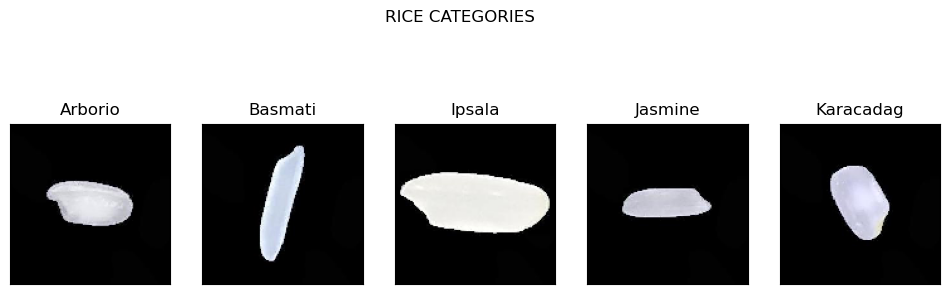

In [21]:
source=r'E:\DS journey\Deep Learning Datasets\Rice Image Dataset\Rice_Image_Dataset'
count =1
plt.figure(figsize =(12,4))
plt.suptitle('RICE CATEGORIES')
for i in os.listdir(source):
    sub_path =os.path.join(source,i)
    img_path= os.path.join(source,i,os.listdir(sub_path)[0])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    plt.subplot(1,5,count)
    
    plt.tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False)
    plt.imshow(img_array.reshape(128,128,3))
    plt.title(d['Classes'][count-1])
    count+=1

>#### Creating the ImageDataGenerator instance for test and train

In [10]:
# Datagenerators with augmentation
train_datagen= ImageDataGenerator(rescale = 1/255,
                                  rotation_range=40,
                                  width_shift_range =0.2,
                                  height_shift_range =0.2,
                                  shear_range =0.2,
                                  zoom_range =0.2,
                                  horizontal_flip = True,)
test_datagen= ImageDataGenerator(rescale =1/255)

>#### Loading the image data from local direcotry

In [11]:
train_generator = train_datagen.flow_from_directory(train,
                                                   target_size= (image_width,image_height),
                                                    batch_size =batch_size,
                                                    class_mode ='categorical')
test_generator =test_datagen.flow_from_directory(test, 
                                                 target_size =(image_width,image_height), 
                                                 batch_size =batch_size, 
                                                 class_mode ='categorical')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [12]:
num_classes=len(train_generator.class_indices)
train_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [13]:
num_classes

5

>#### CNN Model Architecture

In [14]:
model = Sequential([
    
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(45, activation='relu'),
    Dense(15, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')  # num_classes for multi-class classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
    metrics=['accuracy']
)

# Print model summary
model.summary()

E:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 45)             │     5,898,285 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            80 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,899,951 (22.51 MB)

 Trainable params: 5,899,951 (22.51 MB)

 Non-trainable params: 0 (0.00 B)

>#### Using ModelCheckpoint Callback

In [15]:
# Define ModelCheckpoint callback to save the best weights
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(r'best_model.keras', 
                             monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=[checkpoint],
    shuffle = False
)



Epoch 1/5


E:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6526 - loss: 0.8051
Epoch 1: val_accuracy improved from -inf to 0.85420, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3806s 2s/step - accuracy: 0.6526 - loss: 0.8050 - val_accuracy: 0.8542 - val_loss: 0.3601
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.8837 - loss: 0.3042
Epoch 2: val_accuracy improved from 0.85420 to 0.89153, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1875s 1000ms/step - accuracy: 0.8837 - loss: 0.3042 - val_accuracy: 0.8915 - val_loss: 0.2516
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.9179 - loss: 0.2247
Epoch 3: val_accuracy did not improve from 0.89153
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1268s 676ms/step - accuracy: 0.9179 - loss: 0.2247 - val_accuracy: 0.8587 - val_loss: 0.3457
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.9304 - loss: 0.1986
Epoch 4: val_accuracy did not improve from 0.89153
1875/1875 

> #### Model-evaluation

In [16]:
# Load the best weights
model.load_weights('best_model.keras')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Evaluate the model
train_loss, train_accuracy = model.evaluate(train_generator)
print(f'Train accuracy: {train_accuracy:.4f}')
print(f'Train loss: {train_loss:.4f}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.8989 - loss: 0.2481
Test accuracy: 0.8989
Test loss: 0.2438
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 787s 420ms/step - accuracy: 0.9529 - loss: 0.1333
Train accuracy: 0.9546
Train loss: 0.1304


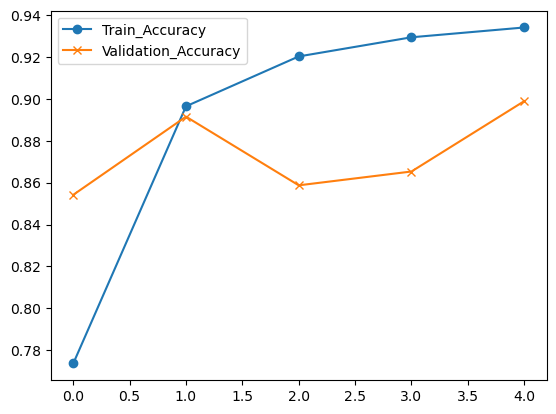

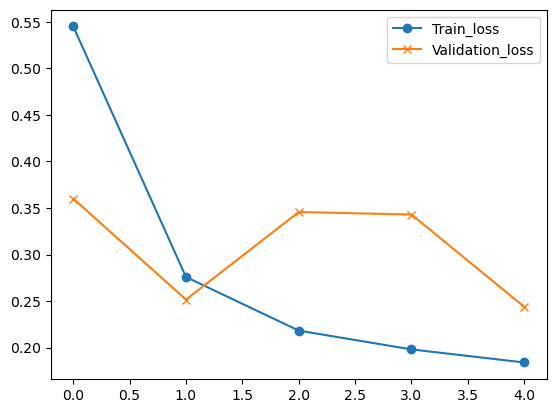

In [17]:
# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker ='o' ,label ='Train_Accuracy')
plt.plot(history.history['val_accuracy'], marker ='x',label ='Validation_Accuracy')
plt.legend()
plt.show()

# Similar plot for loss
plt.plot(history.history['loss'], marker ='o',label ='Train_loss')
plt.plot(history.history['val_loss'],marker ='x',label ='Validation_loss')
plt.legend()
plt.show()

>#### Make Predictions

In [22]:
# Lets use model to predict Rice-category for images from 'test' folder
d=test_generator.class_indices
d

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [27]:
import random
for i in d:
    sub_path=os.path.join(source,i)
    d[i]= os.path.join(sub_path,os.listdir(sub_path)[random.randint(1,3000)])
    # there are 3000 test images in each class

In [28]:
d

{'Arborio': 'E:\\DS journey\\Deep Learning Datasets\\Rice Image Dataset\\Rice_Image_Dataset\\Arborio\\Arborio (12008).jpg',
 'Basmati': 'E:\\DS journey\\Deep Learning Datasets\\Rice Image Dataset\\Rice_Image_Dataset\\Basmati\\basmati (10319).jpg',
 'Ipsala': 'E:\\DS journey\\Deep Learning Datasets\\Rice Image Dataset\\Rice_Image_Dataset\\Ipsala\\Ipsala (12175).jpg',
 'Jasmine': 'E:\\DS journey\\Deep Learning Datasets\\Rice Image Dataset\\Rice_Image_Dataset\\Jasmine\\Jasmine (11554).jpg',
 'Karacadag': 'E:\\DS journey\\Deep Learning Datasets\\Rice Image Dataset\\Rice_Image_Dataset\\Karacadag\\Karacadag (10115).jpg'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


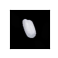

Rice Category as per Model: Arborio
Rice Category as per Actual: Arborio
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


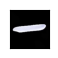

Rice Category as per Model: Basmati
Rice Category as per Actual: Basmati
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


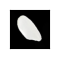

Rice Category as per Model: Ipsala
Rice Category as per Actual: Ipsala
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


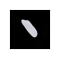

Rice Category as per Model: Jasmine
Rice Category as per Actual: Jasmine
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


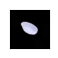

Rice Category as per Model: Karacadag
Rice Category as per Actual: Karacadag


In [29]:
for key,img_path in d.items():
    
    # Load and preprocess a single image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict
    prediction = model.predict(img_array)
    predicted_labels = int(np.argmax(prediction, axis=1).reshape(1,1))
    # image plot part
    plt.figure(figsize =(0.5,0.5))
    plt.tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False)

    plt.imshow(img_array.reshape(128,128,3))
    plt.show()
    print("Rice Category as per Model:",list(d.keys())[predicted_labels])
    print("Rice Category as per Actual:",key)

## Observations:
- Total of 75000 images, 15000 from each variety, total 5 categories of Rice
- {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
- Train & Test breakup is 12000 and 3000 (80-20)
- Firstly created the TRAIN & TEST folders and sub-folders based on classes.
- Using the shutil library copied images from source to respective directories maintaining a 80-20 split.
- Loaded the image data using ImageDataGenrator class object and methods.
- CNN model was created and Results after 5 epochs with 1 Conv layers, 1 max pooling and 3 Dense layers is as follows:
    - Train accuracy: 0.9546 - loss: 0.1304
    - Test accuracy: 0.8989 - loss: 0.2438